<h1>Image compressioni through Singular Value Decomposition</h1>

(np.float64(-0.5), np.float64(799.5), np.float64(462.5), np.float64(-0.5))

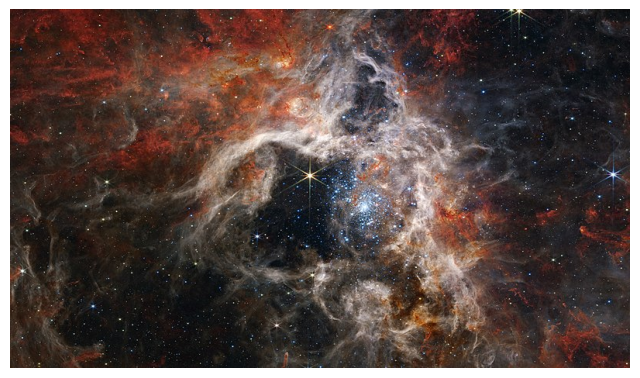

In [3]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [8 ,8]

image_path = 'TarantulaNebula.jpg'

A = imread(image_path)

#Visualize the picture
img = plt.imshow(A)
plt.axis('off')

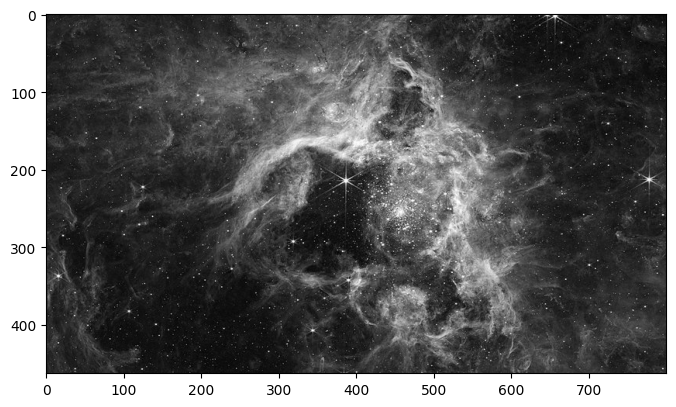

In [4]:
#Convert the picture to gray-scale and visualize it
X = np.mean(A, axis=2)
img = plt.imshow(X)
img.set_cmap('gray')
plt.show()

In [5]:
#What is the picture size?
X.shape

(463, 800)

In [6]:
#Perform the SVD decomposition
U, s, VT = np.linalg.svd(X, full_matrices=False)
U.shape, s.shape, VT.shape

((463, 463), (463,), (463, 800))

Plot the trend of:
- the singular values $\sigma_k$
- the cumulate fraction of singular values $\frac{\sum_{i=1}^k \sigma_i}{\sum_{i=1}^q \sigma_i}$
- the fraction of the "explained variance" $\frac{\sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^q \sigma_i^2}$

Text(0.5, 1.0, 'Explained variance')

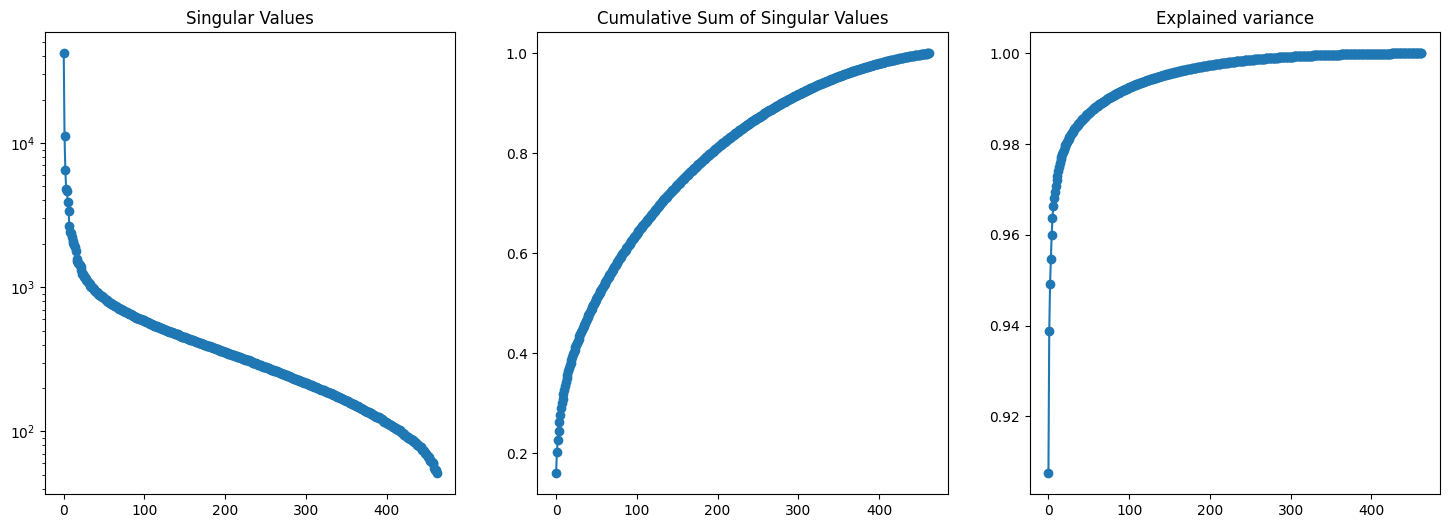

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

axes[0].semilogy(s, 'o-')
axes[0].set_title('Singular Values')

axes[1].plot(np.cumsum(s) / np.sum(s), 'o-')
axes[1].set_title('Cumulative Sum of Singular Values')

axes[2].plot(np.sqrt(np.cumsum(s**2) / np.sum(s**2)), 'o-')
axes[2].set_title('Explained variance')

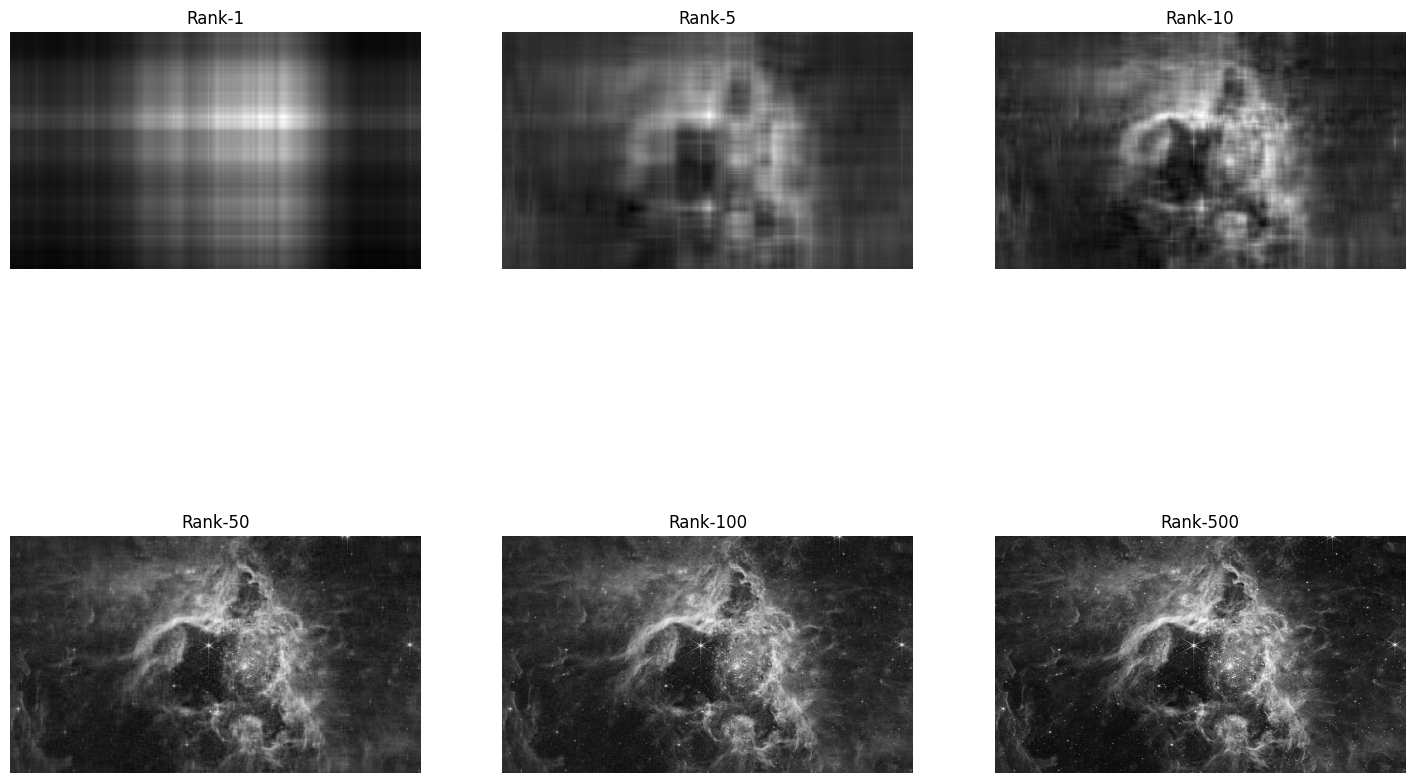

In [8]:
#Visualize the best rank-k matrices for k = 1, 5, 10, 50, 100, 500
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axs = axs.reshape((-1,))
idxs = [1, 5, 10, 50, 100, 500]
for i in range(len(idxs)):
    k = idxs[i]
    X_k = np.matmul(U[:,:k], np.matmul(np.diag(s[:k]), VT[:k,:]))
    axs[i].imshow(X_k, cmap='gray')
    axs[i].set_title('Rank-{}'.format(k))
    axs[i].axis('off')

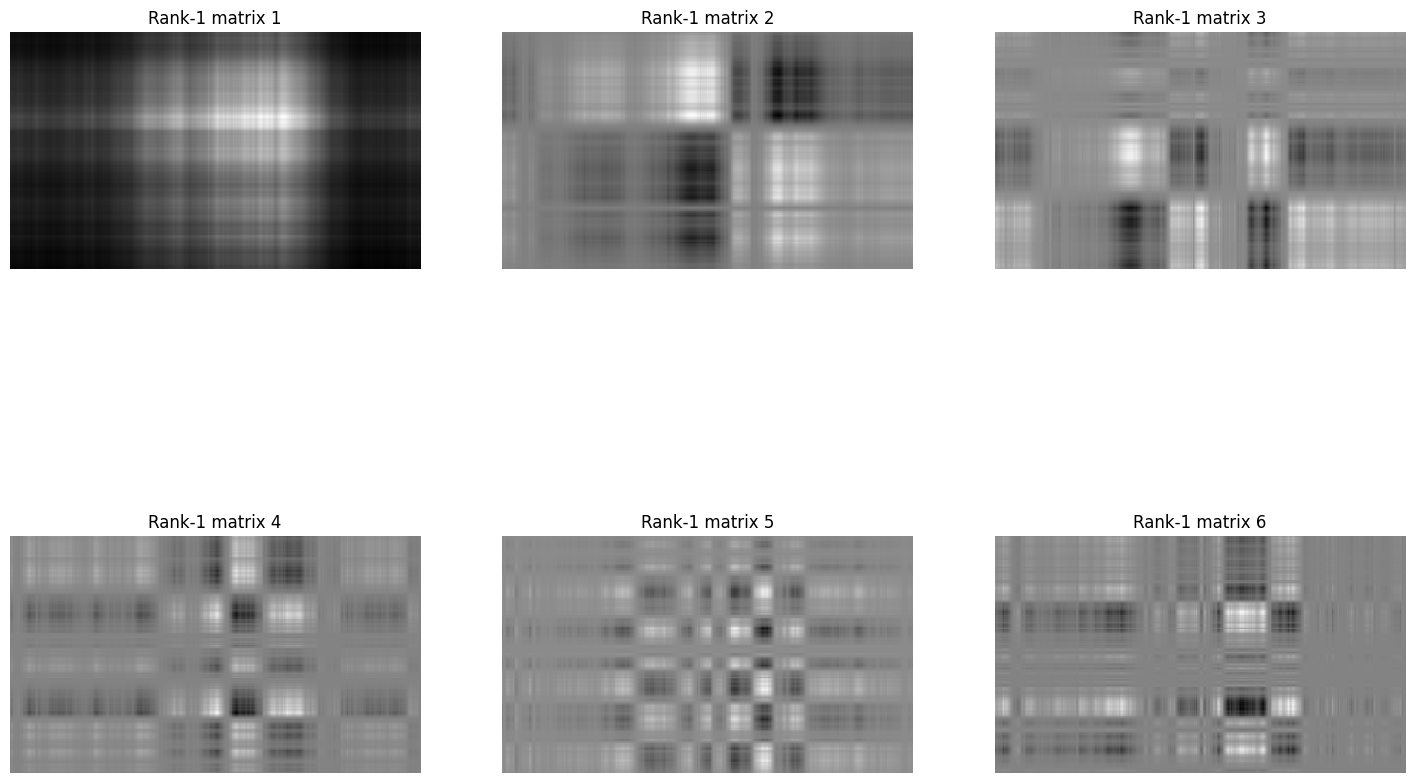

In [9]:
#Visualize the k-th rank-1 matrix, for k = 1, 2, ..., 6
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axs = axs.reshape((-1,))
idxs = [1, 2, 3, 4, 5, 6]
for i in range(len(idxs)):
    k = idxs[i]
    ukvk = np.outer(U[:,k-1], VT[k-1,:])
    axs[i].imshow(ukvk, cmap='gray')
    axs[i].set_title('Rank-1 matrix {}'.format(k))
    axs[i].axis('off')

<h3>Randomized SVD</h3>
Implement now a function that computes the randomized SVD of rank k of a generic matrix A.

In [11]:
def randomized_SVD(A, k):
    P = np.random.randn(A.shape[1], k)
    Z = A @ P
    Q, _ = np.linalg.qr(Z)
    Y = Q.T @ A
    Uy, s, VT = np.linalg.svd(Y, full_matrices=False)
    U = Q @ Uy
    return U, s, VT

In [12]:
#Set k = 100 and compute the randmoized SVD of the picture used above
k = 100
Ur, sr, VTr = randomized_SVD(X, k)

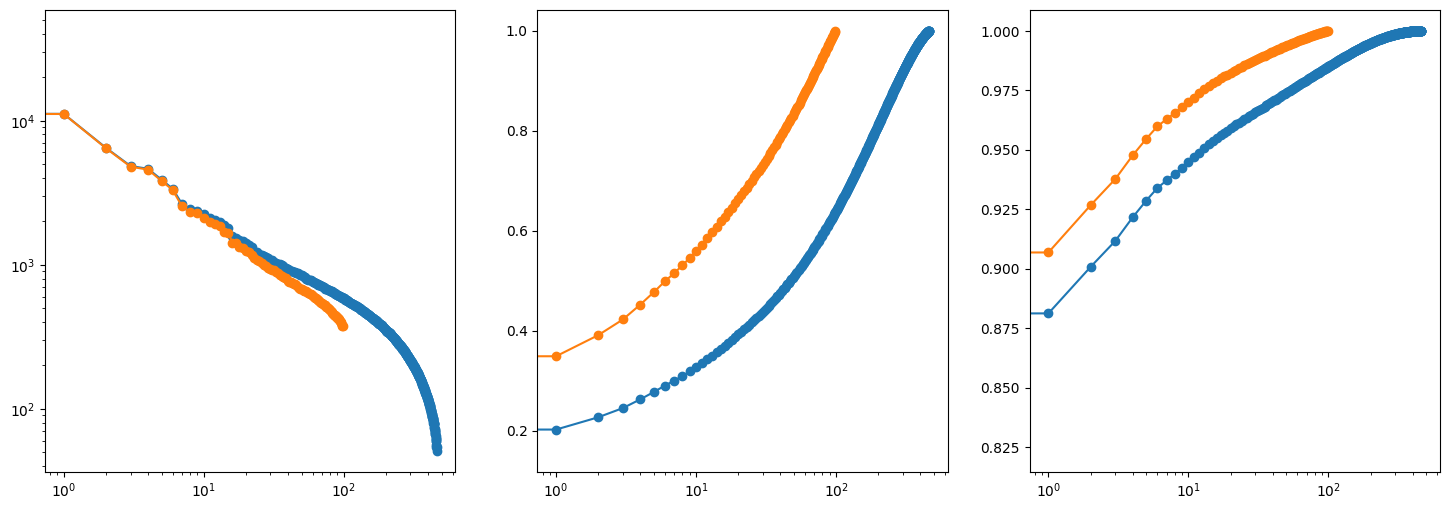

In [15]:
#Plot the approximate singular values, their cumulate values and their cumulate squares, 
# with a comparison of the ones obtained with the "exact" (i.e. non randomized) SVD
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].loglog(s, 'o-')
axs[1].semilogx(np.cumsum(s) / np.sum(s), 'o-')
axs[2].semilogx(np.cumsum(s**2) / np.sum(s**2), 'o-')

axs[0].loglog(sr, 'o-')
axs[1].semilogx(np.cumsum(sr) / np.sum(sr), 'o-')
axs[2].semilogx(np.cumsum(sr**2) / np.sum(sr**2), 'o-')

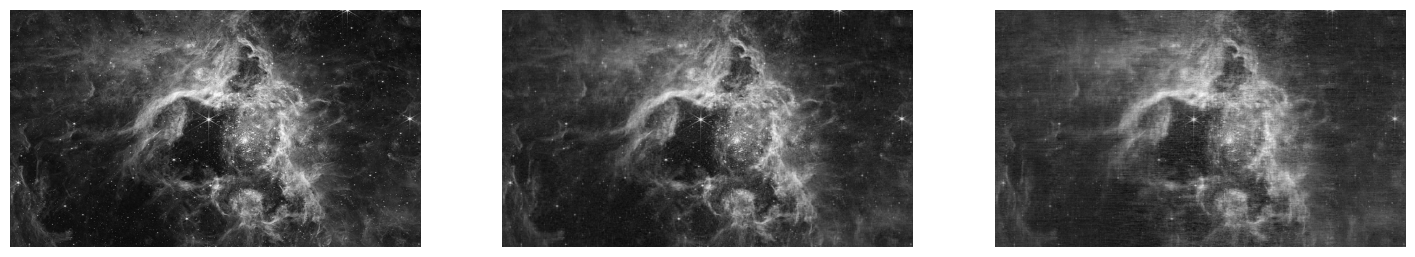

In [17]:
#Compare the original picture with the best rank-k matrix obtained through SVD and the best rank-k matrix obtained through randomized SVD
fix, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(X, cmap='gray')
axs[0].set_axis_off()

axs[1].imshow(U[:, :k] @ np.diag(s[:k]) @ VT[:k, :], cmap='gray')
axs[1].set_axis_off()

axs[2].imshow(Ur @ np.diag(sr) @ VTr, cmap='gray')
axs[2].set_axis_off()

<h1>Cancer diagnostic</h1>

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

ovariancancer_obs_path = './ovariancancer_obs.csv'
ovariancancer_grp_path = './ovariancancer_grp.csv'

A = np.genfromtxt(ovariancancer_obs_path, delimiter=',').transpose()
with open(ovariancancer_grp_path, 'r') as fp:
    grp = np.array(fp.read().split("\n"))
grp = grp[grp != '']

In [24]:
#HOw many patients? How many features?
print(f"The numper of patients is {A.shape[1]} and the number of features is {A.shape[0]}")

The numper of patients is 216 and the number of features is 4000


In [27]:
#How many patients with and without cancer are there in the dataset?
print("Numnber of patients with cancer: ", np.sum(grp == 'Cancer'))
print("Numnber of patients without cancer: ", np.sum(grp == 'Normal'))

Numnber of patients with cancer:  121
Numnber of patients without cancer:  95


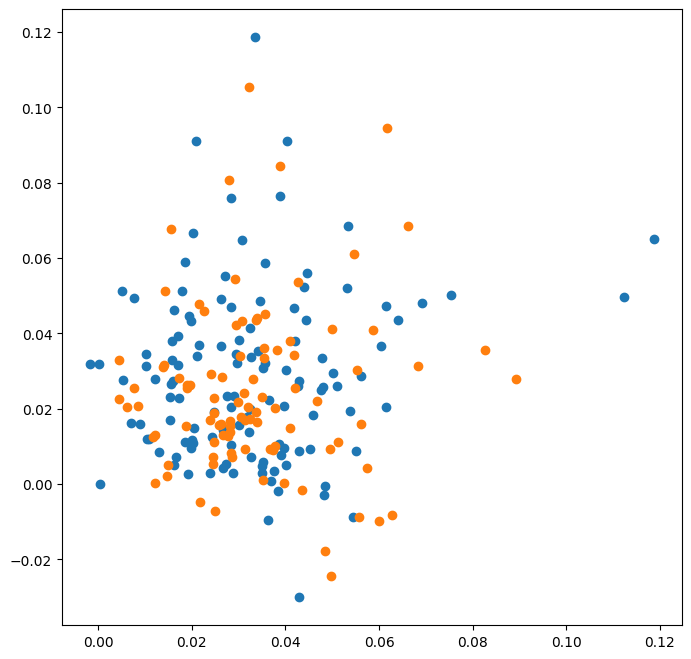

In [28]:
#Choose two proteins (between 1 and 4000), and make a scatterplot of the corresponding values plotting with different colors the data coresponding
# to patients with and without cancer. Can you easily distinguish between patients with/without cancer?
protein_x = 10
protein_y = 999

plt.scatter(A[protein_x, grp == 'Cancer'], A[protein_y, grp == 'Cancer'])
plt.scatter(A[protein_x, grp == 'Normal'], A[protein_y, grp == 'Normal'])

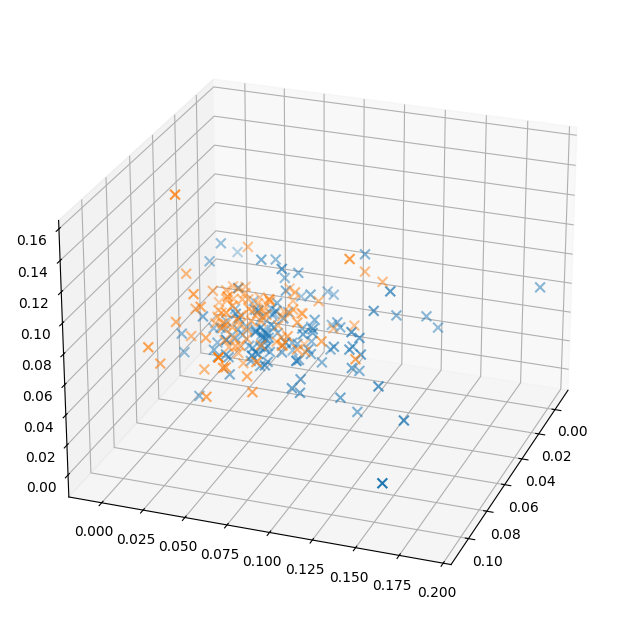

In [36]:
#Repeat the previous point, this time by considering three proteins
protein_z = 2000

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for cat in ["Cancer", "Normal"]:
    ax.scatter(
        A[protein_x, grp == cat],
        A[protein_y + 1, grp == cat],
        A[protein_z + 2, grp == cat],
        marker='x',
        s=50
    )

ax.view_init(25, 20)

In [38]:
import plotly.express as px

px.scatter_3d(
    x = A[protein_x, :],
    y = A[protein_y, :],
    z = A[protein_z, :],
    color = grp
)

<h1>Principal Component Analysis</h1>

In [39]:
#Perform PCA on the data
A_mean = np.mean(A, axis=1)
A_mean.shape

(4000,)

In [40]:
A_bar = A - A_mean[:, None]
U, s, VT = np.linalg.svd(A_bar, full_matrices=False)

Then, plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values $\frac{\sum_{i=1}^k \sigma_i}{\sum_{i=1}^q \sigma_i}$
- the fraction of the "explained variance" $\frac{\sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^q \sigma_i^2}$

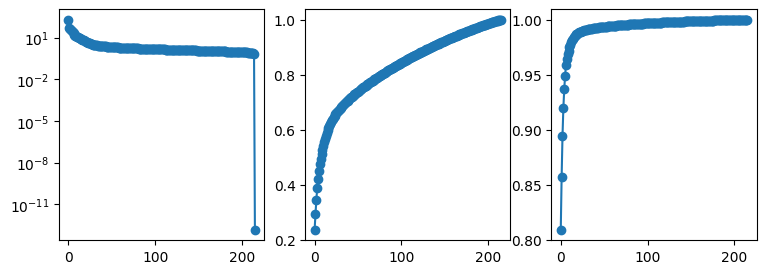

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3))
axs[0].semilogy(s, 'o-')
axs[1].plot(np.cumsum(s) / np.sum(s), 'o-')
axs[2].plot(np.cumsum(s**2) / np.sum(s**2), 'o-')

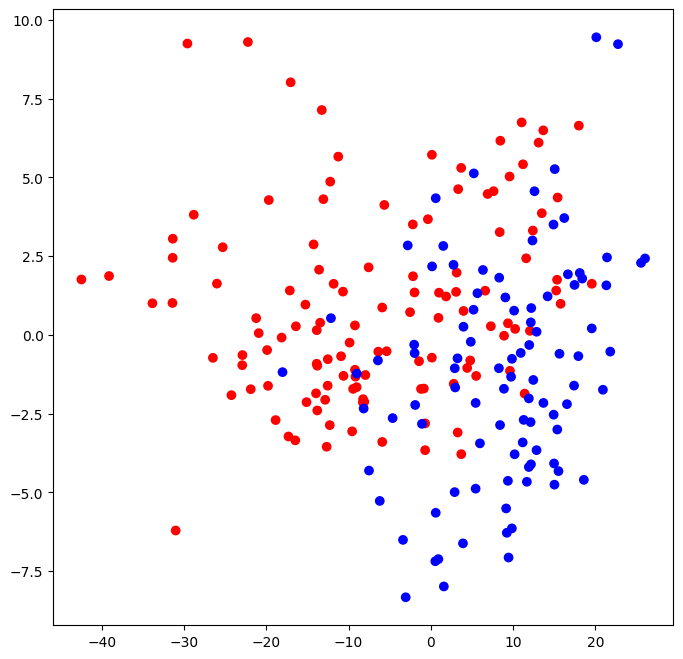

In [44]:
#Make a scatterplot of the firts two principal components of the patients
Phi = U.T @ A_bar
COLORMAP = {"Cancer": "red", "Normal": "blue"}
plt.scatter(Phi[0,:], Phi[1,:], c=[COLORMAP[g] for g in grp])

In [45]:
#Make a scatterplot of the first three principal components of the patients
px.scatter_3d(
    x = Phi[0,:],
    y = Phi[1,:],
    z = Phi[2,:],
    color = grp
)

<h1>Handwriting recognition</h1>
<h2>Data import and visualization</h2>

In [47]:
#Import the MNIST train dataset (https://en.wikipedia.org/wiki/MNIST_database)
import matplotlib.pyplot as plt
import numpy as np

data = np.genfromtxt('./mnist_train_small.csv', delimiter=',')
data.shape

(20000, 785)

In [49]:
#Store the data in a matrix and the labels in a vector
labels_full = data[:, 0]
A_full = data[:, 1:].transpose()
labels_full.shape, A_full.shape

((20000,), (784, 20000))

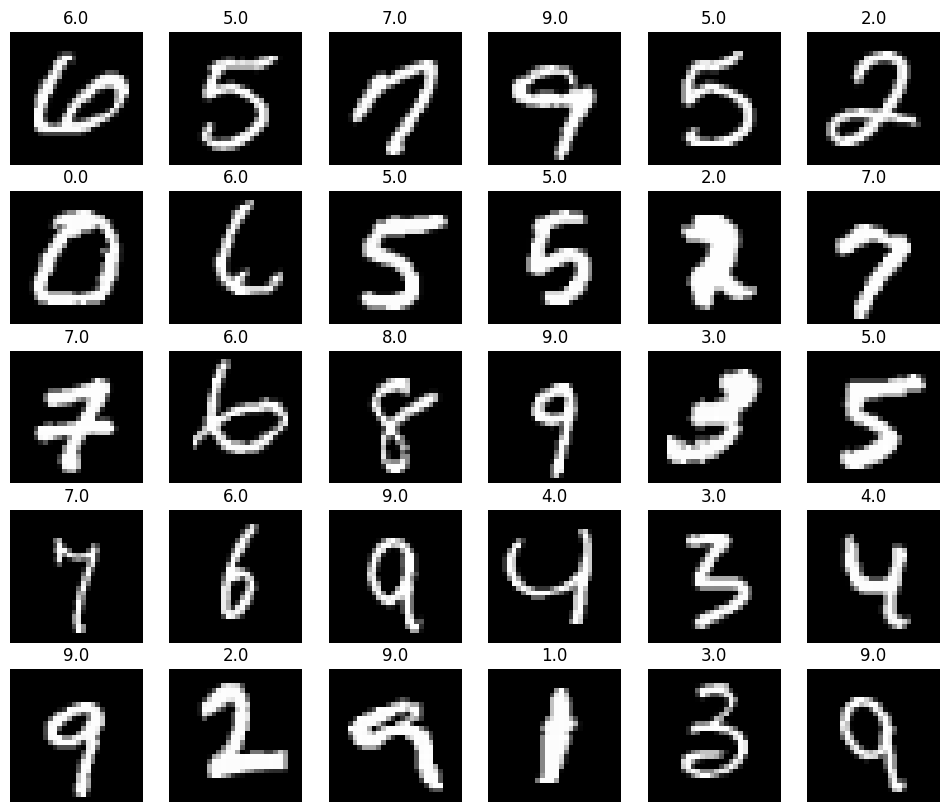

In [50]:
#Visualize the first 30 pictures with the corresponding labels
fig, axs = plt.subplots(5, 6, figsize=(12, 10))
axs = axs.reshape((-1,))
for i in range(len(axs)):
    picture = A_full[:, i].reshape((28, 28))
    axs[i].imshow(picture, cmap='gray')
    axs[i].set_title(f"{labels_full[i]}")
    axs[i].axis('off')

In [51]:
#Visualize the first 30 pictures corresponding the digit "9"
mask_9 = labels_full == 9.
mask_9

array([False, False, False, ..., False,  True, False])

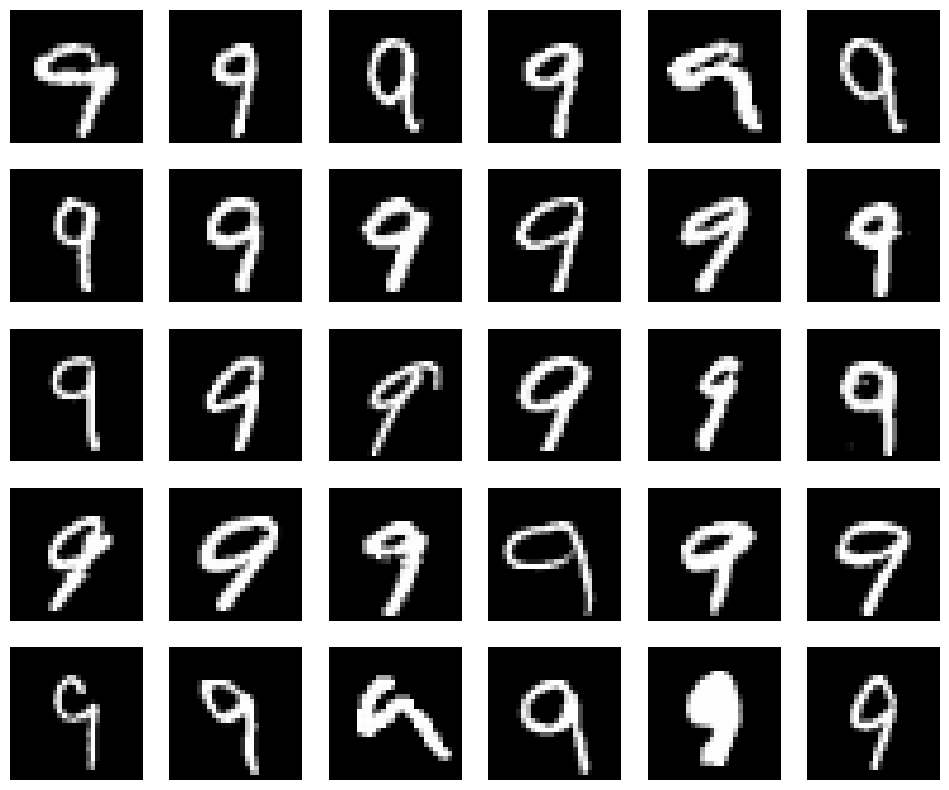

In [52]:
A9 = A_full[:, mask_9]

fig, axs = plt.subplots(5, 6, figsize=(12, 10))
axs = axs.reshape((-1,))
for i in range(len(axs)):
    picture = A9[:, i].reshape((28, 28))
    axs[i].imshow(picture, cmap='gray')
    axs[i].axis('off')

<h3>Classification of two digits (0 and 9)</h3>
We now focus on the digits 0 and 9 only. Build a reduced training dataset containing only images corresponding to these digits.

In [53]:
mask9 = labels_full == 9
mask0 = labels_full == 0
mask0or9 = mask0 | mask9
A = A_full[:, mask0or9]
labels = labels_full[mask0or9]

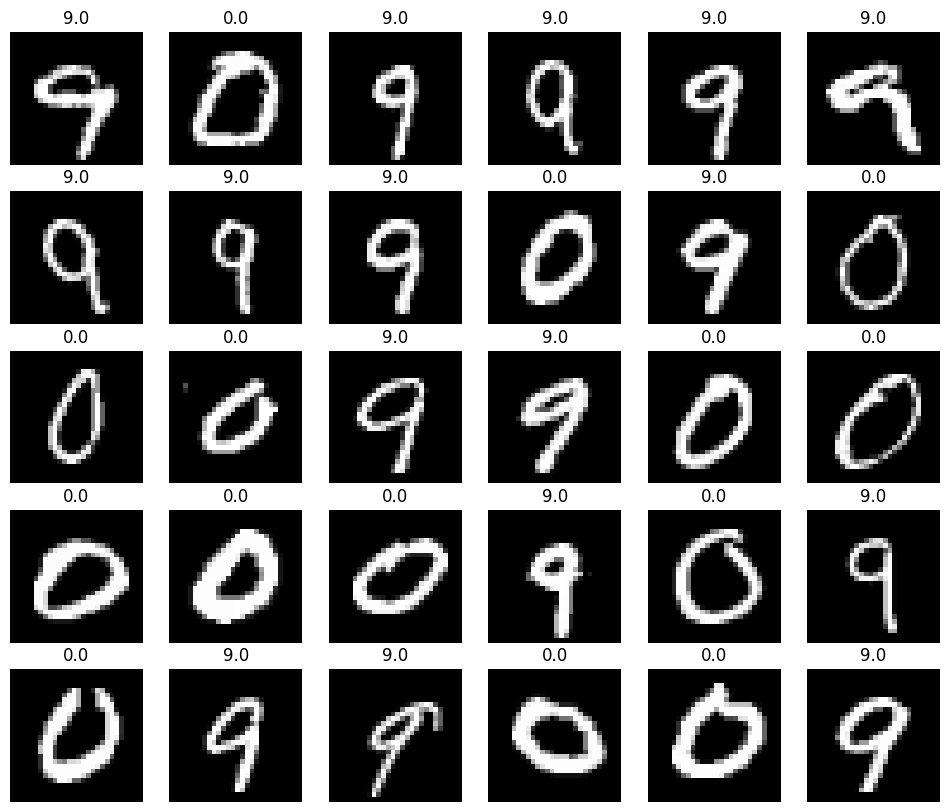

In [54]:
#Plot the first 30 training images.
fig, axs = plt.subplots(5, 6, figsize=(12, 10))
axs = axs.reshape((-1,))
for i in range(len(axs)):
    picture = A[:, i].reshape((28, 28))
    axs[i].imshow(picture, cmap='gray')
    axs[i].set_title(f"{labels[i]}")
    axs[i].axis('off')

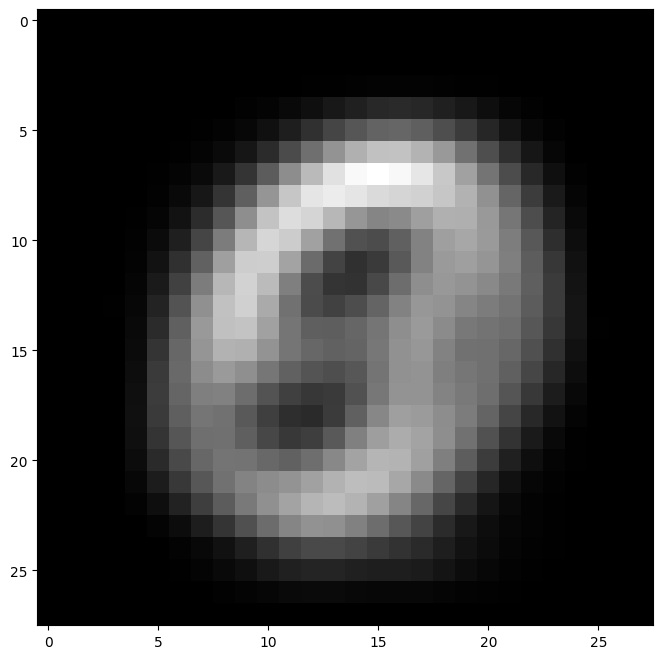

In [56]:
#Compare and visualize the average of the training data
A_mean = np.mean(A, axis=1)
A_baar = A - A_mean[:, None]

plt.imshow(A_mean.reshape((28, 28)), cmap='gray')

Perform PCA on the data. Then, plot the trend of<br>
-the singular values $\sigma_k$ <br>
-the cumulate fraction of singular values $\frac{\sum_{i=1}^k \sigma_i}{\sum_{i=1}^q \sigma_i}$<br>
-the fraction of the "explained variance" $\frac{\sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^q \sigma_i^2}$

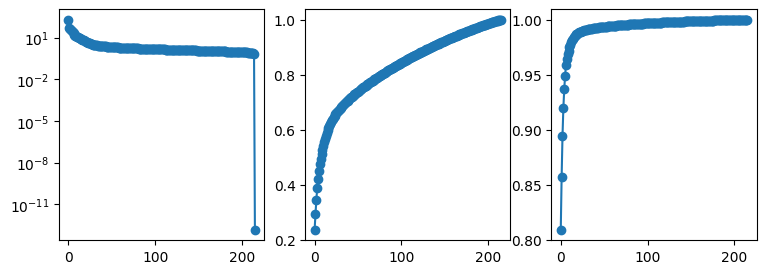

In [59]:
U, s, VT = np.linalg.svd(A_bar, full_matrices=False)

fig, axs = plt.subplots(1, 3, figsize=(9, 3))
axs[0].semilogy(s, 'o-')
axs[1].plot(np.cumsum(s) / np.sum(s), 'o-')
axs[2].plot(np.cumsum(s**2) / np.sum(s**2), 'o-')

In [ ]:
#Visualize the first 30 principal axes
fig, axs = plt.subplots(5, 6, figsize=(12, 10))
axs = axs.reshape((-1,))
for i in range(len(axs)):
    axs[i].imshow(U[:, i].reshape((28, 28)), cmap='gray')
    axs[i].set_axis_off()

In [ ]:
#Compute the first two principal components corresponding to the first image
first_image = A[:, 0].reshape((28, 28))
pc1 = np.inner(first_image, U[:, 0])
pc2 = np.inner(first_image, U[:, 1])
print(f"First principal component of 1st image: {pc1}")
print(f"Second principal component of 1st image: {pc2}")

In [ ]:
#Define a matrix corresponding all the principal components of all the images, and check the result of the previous point
Phi = U.T @ A_bar
print(f"First principal component of 1st image: {Phi[0, 0]}")
print(f"Second principal component of 1st image: {Phi[1, 0]}")

In [ ]:
#Create a scatterplot for the first 2 principal components of all the training images, grouped by label. Consider only the first 500 pictures
n_pics = 500
COLORMAP = {9.: "red", 0.: "blue"}
plt.scatter(
    Phi[0, :n_pics],
    Phi[1, :n_pics], 
    c=[COLORMAP[l] for l in labels[:n_pics]]
)

In [ ]:
#Define a classifier, by fixing a threshold on the first principal component. Then, test the classifier on the MNIST test dataset. 
#Compute the number of true/false positive/negative for both the digits (confusion matrix) and the accuracy of the classifier.
threshold = 0.0
n_pics = 500
COLORMAP = {9.: "red", 0.: "blue"}
plt.scatter(
    Phi[0, :n_pics],
    Phi[1, :n_pics], 
    c=[COLORMAP[l] for l in labels[:n_pics]]
)
plt.axvline(threshold, color="black", linestyle="--")

In [ ]:
mask_predicted = Phi_test[0, :] > threshold
labels_predicted = mask_predicted * 9 + (1 - mask_predicted) * 0

true_0 = np.sum((labels_test == 0) & (labels_predicted == 0))
false_0 = np.sum((labels_test == 0) & (labels_predicted == 9))
true_9 = np.sum((labels_test == 9) & (labels_predicted == 9))
false_9 = np.sum((labels_test == 9) & (labels_predicted == 0))

accuracy = (true_0 + true_9) / len(labels_test)

print(f"True 0: {true_0}")
print(f"False 0: {false_0}")
print(f"True 9: {true_9}")
print(f"False 9: {false_9}")
print(f"Accuracy: {accuracy}")